<a href="https://colab.research.google.com/github/syhamham/AWA-Project/blob/main/electronic1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 전류 - 비교존

In [27]:
import pandas as pd
from prophet import Prophet

In [28]:
df = pd.read_excel('data.xlsx')
df.head()

ds         y
0 2023-09-25 09:54:00  4.890000
1 2023-09-25 09:55:00  4.963333
2 2023-09-25 09:56:00  5.060000
3 2023-09-25 09:57:00  4.980000
4 2023-09-25 09:58:00  4.990000

In [29]:
df.tail()

ds      y
37738 2023-10-23 12:46:00  5.205
37739 2023-10-23 12:47:00  5.380
37740 2023-10-23 12:48:00  5.255
37741 2023-10-23 12:49:00  5.190
37742 2023-10-23 12:50:00  5.330

In [30]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyac8iyy9/wfdxi1v_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyac8iyy9/eyl6eucl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78392', 'data', 'file=/tmp/tmpyac8iyy9/wfdxi1v_.json', 'init=/tmp/tmpyac8iyy9/eyl6eucl.json', 'output', 'file=/tmp/tmpyac8iyy9/prophet_model3teumc08/prophet_model-20240514063316.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:33:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:33:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [31]:
future = m.make_future_dataframe(periods=60, freq='1min')
future.tail(60)

ds
37743 2023-10-23 12:51:00
37744 2023-10-23 12:52:00
37745 2023-10-23 12:53:00
37746 2023-10-23 12:54:00
37747 2023-10-23 12:55:00
37748 2023-10-23 12:56:00
37749 2023-10-23 12:57:00
37750 2023-10-23 12:58:00
37751 2023-10-23 12:59:00
37752 2023-10-23 13:00:00
37753 2023-10-23 13:01:00
37754 2023-10-23 13:02:00
37755 2023-10-23 13:03:00
37756 2023-10-23 13:04:00
37757 2023-10-23 13:05:00
37758 2023-10-23 13:06:00
37759 2023-10-23 13:07:00
37760 2023-10-23 13:08:00
37761 2023-10-23 13:09:00
37762 2023-10-23 13:10:00
37763 2023-10-23 13:11:00
37764 2023-10-23 13:12:00
37765 2023-10-23 13:13:00
37766 2023-10-23 13:14:00
37767 2023-10-23 13:15:00
37768 2023-10-23 13:16:00
37769 2023-10-23 13:17:00
37770 2023-10-23 13:18:00
37771 2023-10-23 13:19:00
37772 2023-10-23 13:20:00
37773 2023-10-23 13:21:00
37774 2023-10-23 13:22:00
37775 2023-10-23 13:23:00
37776 2023-10-23 13:24:00
37777 2023-10-23 13:25:00
37778 2023-10-23 13:26:00
37779 2023-10-23 13:27:00
37780 2023-10-23 13:28:00
37781 2023-10-23 13:29:00
37782 2023-10-23 13:30:00
37783 2023-10-23 13:31:00
37784 2023-10-23 13:32:00
37785 2023-10-23 13:33:00
37786 2023-10-23 13:34:00
37787 2023-10-23 13:35:00
37788 2023-10-23 13:36:00
37789 2023-10-23 13:37:00
37790 2023-10-23 13:38:00
37791 2023-10-23 13:39:00
37792 2023-10-23 13:40:00
37793 2023-10-23 13:41:00
37794 2023-10-23 13:42:00
37795 2023-10-23 13:43:00
37796 2023-10-23 13:44:00
37797 2023-10-23 13:45:00
37798 2023-10-23 13:46:00
37799 2023-10-23 13:47:00
37800 2023-10-23 13:48:00
37801 2023-10-23 13:49:00
37802 2023-10-23 13:50:00

In [32]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
37798 2023-10-23 13:46:00  5.111077    4.993076    5.227636
37799 2023-10-23 13:47:00  5.110659    4.993274    5.231710
37800 2023-10-23 13:48:00  5.110243    4.980284    5.228748
37801 2023-10-23 13:49:00  5.109830    4.986681    5.231578
37802 2023-10-23 13:50:00  5.109419    4.984229    5.235420

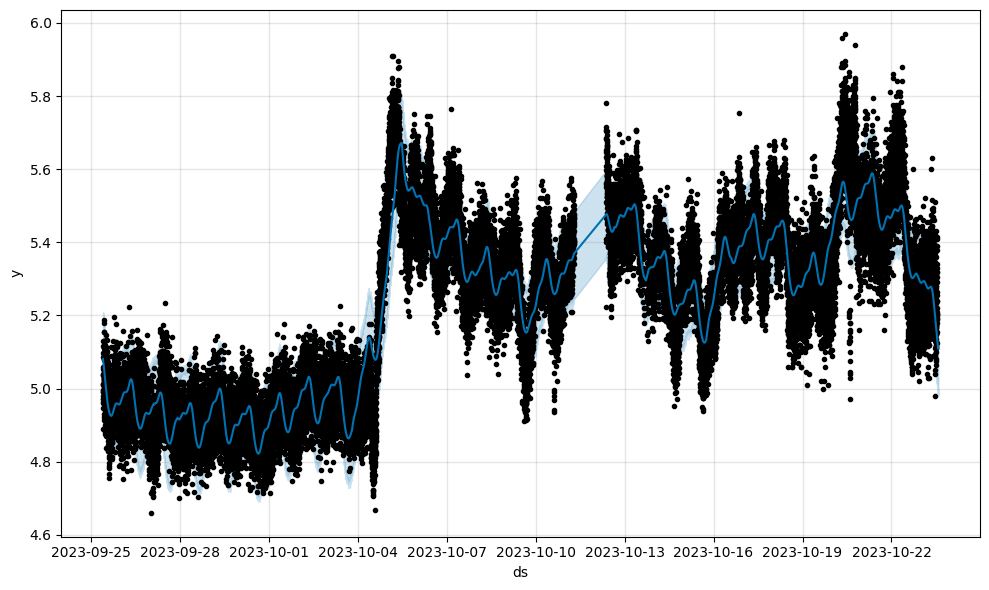

In [33]:
fig1 = m.plot(forecast)
fig1.show()

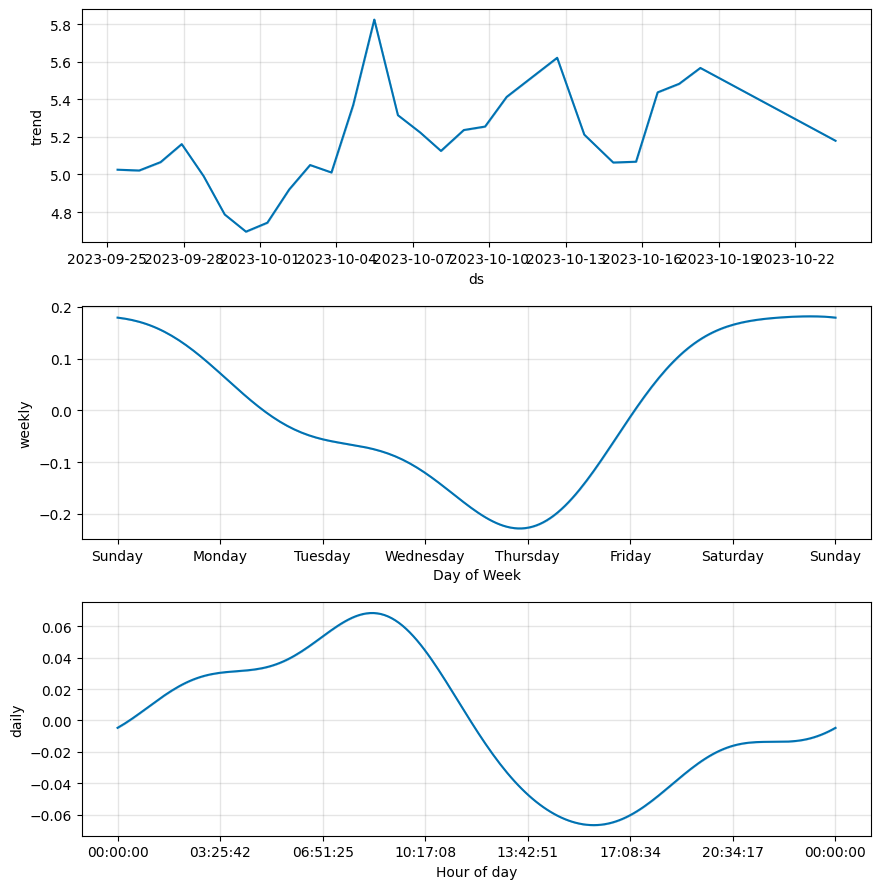

In [34]:
fig2 = m.plot_components(forecast)
fig2.show()

In [35]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [36]:
plot_components_plotly(m, forecast)